<a href="https://colab.research.google.com/github/moonsung1234/LearningExample/blob/main/DecisionTreeClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
wine = pd.read_csv("https://bit.ly/wine-date")
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [7]:
data = wine[["alcohol", "sugar", "pH"]]
target = wine["class"]

In [8]:
data.head()

,alcohol,sugar,pH
0,9.4,1.9,3.51
1,9.8,2.6,3.20
2,9.8,2.3,3.26
3,9.8,1.9,3.16
4,9.4,1.9,3.51


In [9]:
target.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: class, dtype: float64

In [15]:
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=2021)

sc = StandardScaler()
sc.fit(train_input, train_target)

train_scaled = sc.transform(train_input)
test_scaled = sc.transform(test_input)

In [16]:
model = DecisionTreeClassifier(random_state=2021)
model.fit(train_scaled, train_target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2021, splitter='best')

In [17]:
print(model.score(train_scaled, train_target)) # 결과가 과대적합 된것을 볼 수 있음.
print(model.score(test_scaled, test_target))

0.9973061381566288
0.8530769230769231


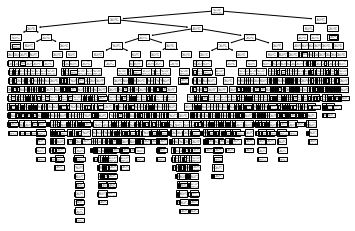

In [20]:
plot_tree(model)
plt.show()

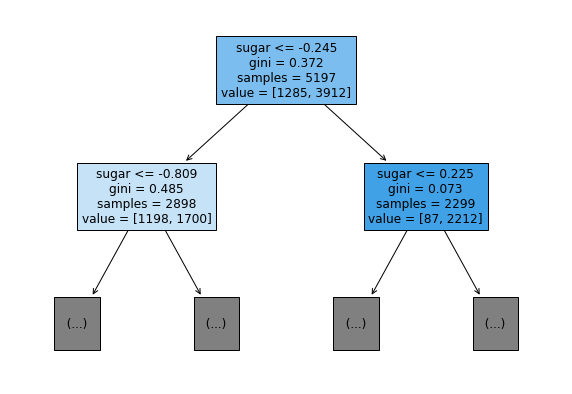

In [24]:
plt.figure(figsize=(10, 7))
plot_tree(model, max_depth=1, filled=True, feature_names=["alcohol", "sugar", "pH"])
plt.show()

**결정 트리(Decision Tree) 분류 방식**
> **지니 불순도 (gini)** = 1 - (음성 클래스 비율^2 + 양성 클래스 비율^2)

> **엔트로피 불순도 (entropy)** = -음성 클래스 비율 * log2(음성 클래스 비율) - 양성 클래스 비율 * log2(양성 클래스 비율)

> **불순도의 차이** = 부모의 불순도 - (왼쪽 노드 샘플 수 / 부모의 샘플 수) * 왼쪽 노드 불순도 - (오른쪽 노드 샘플 수 / 부모의 샘플 수) * 오른쪽 노드 불순도 

<br/>

*   부모 노드와 자식 노드의 불순도 차이를 **정보이득(information gain)** 이라고 한다.
*   결정 트리 알고리즘은 정보이득이 최대가 되도록 데이터를 나눈다.

<br/>

In [50]:
model = DecisionTreeClassifier(max_depth=5, random_state=2021) # 가지치기 (max_depth 매개변수로 노드의 깊이를 설정해주는 작업)
model.fit(train_scaled, train_target) # 트리 모델은 전처리작업이 필요없음

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2021, splitter='best')

In [51]:
# train data 의 성능은 낮아졌지만 test data 의 성능은 거의 그대로

print(model.score(train_scaled, train_target))
print(model.score(test_scaled, test_target))

0.8703097941119877
0.8646153846153846


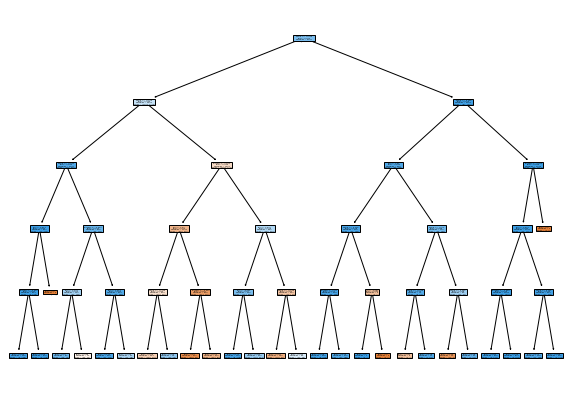

In [52]:
plt.figure(figsize=(10, 7))
plot_tree(model, filled=True, feature_names=["alcohol", "sugar", "pH"])
plt.show()

In [54]:
print(["alcohol", "sugar", "pH"])
print(model.feature_importances_) # 특성 중요도

['alcohol', 'sugar', 'pH']
[0.12511707 0.74624021 0.12864271]
